<a href="https://colab.research.google.com/github/saurabhsingh1995/python/blob/main/tvs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/github project/listings.csv')

In [ ]:
df.shape

(16646, 74)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16646 entries, 0 to 16645
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16646 non-null  int64  
 1   listing_url                                   16646 non-null  object 
 2   scrape_id                                     16646 non-null  int64  
 3   last_scraped                                  16646 non-null  object 
 4   name                                          16636 non-null  object 
 5   description                                   16557 non-null  object 
 6   neighborhood_overview                         10031 non-null  object 
 7   picture_url                                   16646 non-null  object 
 8   host_id                                       16646 non-null  int64  
 9   host_url                                      16646 non-null 

In [ ]:
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20220607181919,2022-06-08,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,...,4.92,4.77,4.38,HUTB-002062,t,35,35,0,0,0.25
1,592553071373622034,https://www.airbnb.com/rooms/592553071373622034,20220607181919,2022-06-07,TRAVEL TIME RENT FOR MONTHS,APARTAMENTO CON 2 BAÑOS !!. PÒR MESES. Perfec...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,115783949,https://www.airbnb.com/users/show/115783949,...,NaN,NaN,NaN,NaN,f,28,27,1,0,NaN


In [ ]:
df[[ 'price', 'host_response_rate', 'host_acceptance_rate']].head()

,price,host_response_rate,host_acceptance_rate
0,$220.00,98%,92%
1,$61.00,100%,85%
2,$300.00,25%,100%
3,$192.00,100%,99%
4,$140.00,99%,100%


In [ ]:
#df['price'] = df['price'].str[1:].replace(",","").astype('float')
df['host_response_rate'] = df['host_response_rate'].str[:-1].astype('float')/100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str[:-1].astype('float')/100

In [ ]:
df['price'] = df['price'].replace(",", "").astype('float')

In [ ]:
df[[ 'price', 'host_response_rate', 'host_acceptance_rate']].head()

,price,host_response_rate,host_acceptance_rate
0,220.0,0.98,0.92
1,61.0,1.00,0.85
2,300.0,0.25,1.00
3,192.0,1.00,0.99
4,140.0,0.99,1.00


In [ ]:
df[["bathrooms_text"]].head()

,bathrooms_text
0,2 baths
1,2 baths
2,1 shared bath
3,1 shared bath
4,1 bath


In [ ]:
df['bathroom_qty'] = df['bathrooms_text'].str.split(" ", expand = True)[0]
df['bathroom_type'] = df['bathrooms_text'].str.split(" ", expand = True)[1]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: ignored

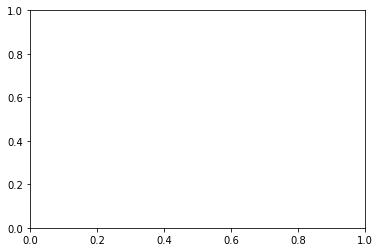

In [ ]:
df = df[df.price!= 0]
df.loc[:, 'log_price'] = np.log(df.loc[:, 'price'])
sns.distplot(x= 'log_price')

In [ ]:
print(p)

0        5.393628
1        4.110874
2        5.703782
3        5.257495
4        4.941642
           ...   
16641    4.143135
16642    5.337538
16643    3.218876
16644    4.025352
16645    4.262680
Name: price, Length: 16646, dtype: float64
